In [1]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterator, *args, **kwargs):
        return iterator
    
import numpy as np
import scipy as sp
from scipy import constants
from pylab import *
import joblib


import os,sys
from importlib import reload
import copy
sys.path.append("../tracker")

In [2]:
import kalmanfilter as KF
import utilities as Util
import trackfinder as TF
import datatypes
from datatypes import *

reload(TF)
reload(Util)

<module 'utilities' from '../tracker\\utilities.py'>

In [3]:
steel_height=0.03 #m
Box_IP_Depth=85.47#m
def coord_det2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """
    return np.array([vector_xyz[0]+119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_sim2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """
    return np.array([vector_xyz[1],      -vector_xyz[2]+Box_IP_Depth, vector_xyz[0]])*100 # turn to cm
def coord_det2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """    
    return coord_sim2cms(coord_det2sim(vector_xyz))

def coord_sim2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[0]-119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_cms2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return coord_sim2det(coord_cms2sim(vector_xyz))

def coord_cms2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[2],      vector_xyz[0], -vector_xyz[1]+Box_IP_Depth*100])/100 # turn to m    
    

In [4]:
events=joblib.load("events_example.joblib")
events[17][:10]


[Hit(x=-325.0685314464063, y=9893.0, z=10893.25, t=38.068649306092674, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=0),
 Hit(x=-548.3019981779318, y=9893.0, z=10875.25, t=38.09496988337209, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=2, ind=1),
 Hit(x=-1065.75, y=10136.599999999999, z=10800.172668914418, t=273.15535136158763, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=5, ind=2),
 Hit(x=-499.5, y=9893.0, z=10758.25, t=59.94317132518105, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=2, ind=3),
 Hit(x=249.09620341779794, y=9893.0, z=10776.25, t=39.45528150081722, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=4),
 Hit(x=259.25, y=9974.2, z=10833.29142108195, t=

In [5]:
hits = events[2]

tf = TF.TrackFinder(method="greedy", debug=True)
tf.parameters["cut_track_HitAddChi2"]=12
tf.parameters["cut_track_HitDropChi2"]=8
tf.parameters["cut_track_HitProjectionSigma"]=10
tf.parameters["cut_track_TrackChi2Reduced"]=4
tf.parameters["cut_track_TrackNHitsMin"]=3
tf.parameters["fit_track_MultipleScattering"]=False


hits_grouped = Util.track.group_hits_by_layer(hits)
hits_found,chi2_found = tf.find_once(hits, hits_grouped, [2,3,12])
hits_found,chi2_found


  Hit found: Hit(x=618.4590229514891, y=9893.0, z=8573.75, t=38.18684707488747, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=2) ; chi2 0.0
  Hit found: Hit(x=696.9334297995334, y=10055.400000000001, z=8767.25, t=43.7033180133856, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=4, ind=58) ; chi2 1.8062077061926258
  No hits added from layer 5. Chi2 of hits [159.77849390052705, 25.115029901469452]. Hits [[7.13750000e+02 1.01366000e+04 8.69330016e+03 4.79286633e+01
  1.29903811e+00 2.88675135e-01 1.34167899e+01 7.07106781e-01
  5.00000000e+00 5.00000000e+00]
 [7.09250000e+02 1.01366000e+04 8.79722654e+03 4.70841674e+01
  1.29903811e+00 2.88675135e-01 1.34167899e+01 7.07106781e-01
  5.00000000e+00 5.90000000e+01]]


([Hit(x=618.4590229514891, y=9893.0, z=8573.75, t=38.18684707488747, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=2),
  Hit(x=646.25, y=9974.2, z=8662.4882148008, t=40.814269907349605, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=3, ind=3),
  Hit(x=696.9334297995334, y=10055.400000000001, z=8767.25, t=43.7033180133856, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=4, ind=58)],
 1.8062077061980035)

In [177]:
hits = events[40]
reload(TF)

<module 'trackfinder' from '../tracker\\trackfinder.py'>

In [178]:
# tf = TF.TrackFinder(method="recursive", debug=False)
tf = TF.TrackFinder(method="greedy", debug=False)
tf.parameters["cut_track_HitAddChi2"]=15
tf.parameters["cut_track_HitDropChi2"]=12
tf.parameters["cut_track_HitProjectionSigma"]=7
tf.parameters["cut_track_TrackChi2Reduced"]=4
tf.parameters["cut_track_TrackNHitsMin"]=3
tf.parameters["cut_track_TrackSpeed"] = [15,50]
tf.parameters["fit_track_MultipleScattering"]=True
# %timeit -n 3 tf.run(hits)
tracks = tf.run(hits)
print(len(tracks))
joblib.dump(tracks, "tracks_example.joblib")

# for ev in events:
#     hits=events[ev]
#     tracks = tf.run(hits)
    

16


['tracks_example.joblib']

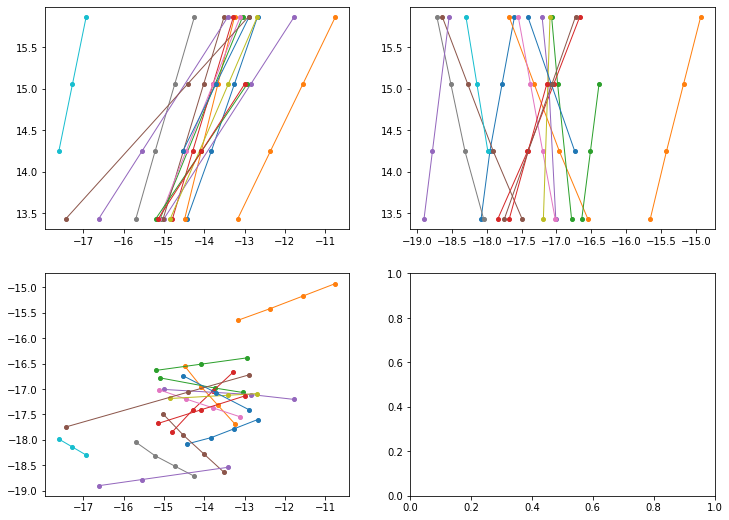

In [179]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label=track_label)

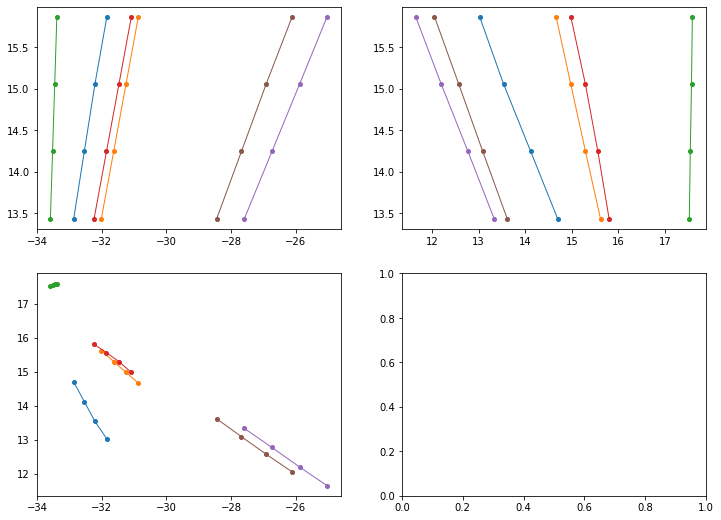

In [9]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label=track_label)

In [10]:
for track in tracks:
    print(np.diag(track.cov), track.chi2)

[7.77392024e+00 8.48194499e-01 2.28379673e-01 8.86730631e-03
 5.17335129e-03 1.09779789e-02] 5.649195691004058
[1.50629719e+01 8.46208187e-01 2.28207176e-01 1.15311453e-02
 3.04241377e-03 9.13675997e-03] 2.0532017558742357
[1.58836138e+01 8.41857452e-01 2.27902051e-01 1.11772538e-02
 1.64945300e-04 9.14713273e-03] 1.8901201859317265
[1.79008099e+01 8.58521056e-01 2.28466734e-01 1.21462459e-02
 2.75614406e-03 8.90680414e-03] 8.700885259933198
[1.81405356e+01 8.98813331e-01 2.31033892e-01 1.47878564e-02
 9.58513207e-03 8.88207735e-03] 3.4873392930293425
[1.65467203e+01 9.08011176e-01 2.31930318e-01 1.39116693e-02
 8.18681930e-03 8.82875192e-03] 6.8271284026573795


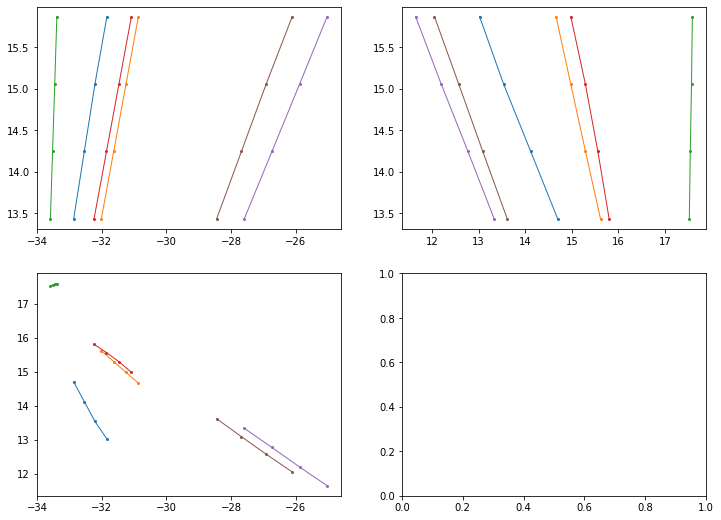

In [11]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=4,label=track_label)